# Phys555 Assignment 1 Question 1

Q1- Use PCA for the alfalfa and wine data set. Plot the explained variance ratio vs. the principle components for each data set.  
- Explanation of the problem and data as an introduction (2 points)
- Informative plots, the caption, labels, the explanations (2 points)
- Explaining/discussing the results (2 points)
- Coherence and informative cells: clear code with a very short explanation to follow the code (2 points)
- Conclusion/references (2 points)

# Introduction

Principal component analysis (PCA) allows for the analysis of large datasets that have a high number of dimensions, increasing the interpretability of the data while perserving the maximum amount of information. There are two definitions of PCA, as state in Bishop (2006): 

## 1. Maximum Variance: 
**the orthogonal projection of data onto a lower dimensional linear space (called the principal subspace), such that the variance of the projected data is maximized. The goal is to project the data onto a space having dimensionality M < D where D is the dimensionality of x, while maximizing the variance of the projected data.** 

In practice, the variance is given by: 

$ u_{1}^{T}Su_{1} = \lambda_{1}$

where $u_{1}$ is a D-dimensional unit vector defining the direction of space M, and S is the data covariance matrix. 

The variance is maximized when $u_{1}$ is equal to the eigenvector having the largest eigenvalue $\lambda_{1}$. This eigenvector is known as the *first principal component*. 

As stated in Bishop (2006), a summary of the method is "evaluating the mean and the covariance matrix of the dataset, and then finding the M eigenvectors of S corresponding to the M largest eigenvalues".

More principal components are defined incrementally by choosing each new direction to be that which maximizes the projected variance within all directions orthogonal to those already considered. 

## 2. Minimum Error: 
**minimize the projection cost, defined as the mean squared distance between the data points and their projections.**

Defining J as the measure of distortion which is introduced by the reduction in dimensionality, 

$ J = \frac{1}{N}\sum_{n=1}^{N}|| x_{n} - \tilde{x_{n}}||^2$

where $x_{n}$ is the original data point, and $\tilde{x_{n}}$ is its approximation averaged over the dataset. The goal is to minimize J. Using the equation listed in the maximum variance definition, J can be rewritten as: 

$ J = \sum_{i=M+t}^{D}\lambda_{i}$

which is the sum of the eigenvalues of those eigenvectors that are orthogonal to the principal subspace. The eigenvectors defining the principal subspace are those corresponding to the M largest eigenvalues.

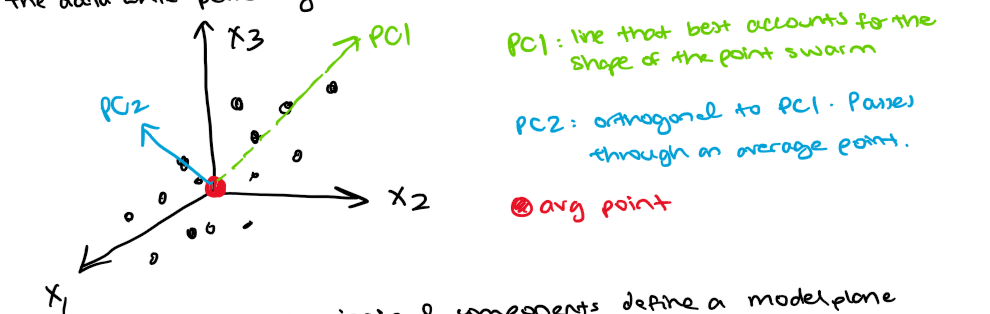

## Applying PCA with Python

In this notebook, I will use PCA for two different datasets; the Alfalfa dataset, and the Wine Dataset. 

The Alfalfa dataset was provided to us in class, and the variables are presented in unlabelled columns. I believe the columns represent photometric data. 

The wine dataset was downloaded from: https://archive.ics.uci.edu/ml/datasets/wine+quality. A discussion of the wine dataset is included in the "Wine Dataset" section of this notebook.


# Alfalfa Dataset

In [27]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Rectangle

15
[[ 8.67440e+00 -1.69118e+01 -1.80226e+01 ...  0.00000e+00  1.28200e+00
  -9.81610e+00]
 [ 9.60990e+00 -1.78492e+01 -1.83277e+01 ...  1.94000e-01  3.46900e+00
  -1.03051e+01]
 [ 8.02870e+00 -1.58953e+01 -1.67127e+01 ...  0.00000e+00  5.55000e-01
  -8.93970e+00]
 ...
 [ 9.82960e+00 -1.73374e+01 -1.86612e+01 ...  6.14000e-01  2.87100e+00
  -1.11577e+01]
 [ 9.87310e+00 -1.82839e+01 -1.92808e+01 ...  8.00000e-03  3.14800e+00
  -1.00761e+01]
 [ 9.38290e+00 -1.60363e+01 -1.74492e+01 ...  3.73000e-01  1.44800e+00
  -1.10952e+01]]


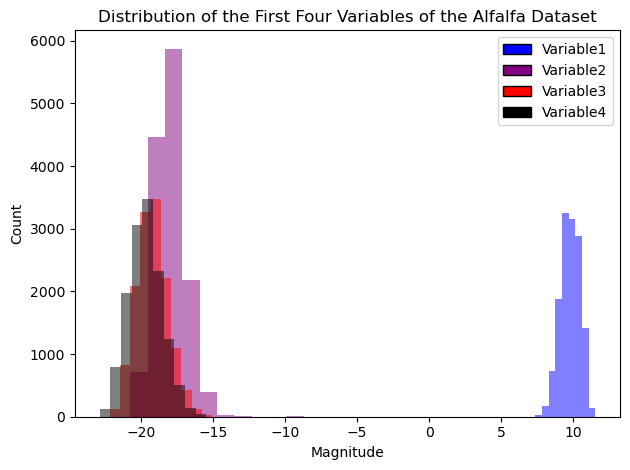

(13674, 15)

In [54]:
# Load the alfalfa dataset
inp_alf= np.load('inp_alfalfa.npy')

# Print the number of columns (ie. variables) in the dataset
num_rows, num_cols = inp_alf.shape
print(num_cols)

# Print the dataset to see the data
print(inp_alf)

# Plot a histogram of the first 4 variables within the dataset as an example, and to visualize the data spread
colors = ["blue", "purple", "red", 'black']   
plt.hist(inp_alf[:,0], color=colors[0], alpha=0.5)
plt.hist(inp_alf[:,1], color=colors[1], alpha=0.5)
plt.hist(inp_alf[:,2], color=colors[2], alpha=0.5)
plt.hist(inp_alf[:,3], color=colors[3], alpha=0.5)

handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
labels = ["Variable1", "Variable2", "Variable3", "Variable4"]
plt.legend(handles, labels, loc='best')
plt.ylabel('Count')
plt.xlabel('Magnitude')
plt.title('Distribution of the First Four Variables of the Alfalfa Dataset')
plt.tight_layout()
plt.show()

#plt.hist(inp_alf)

# Print the shape of the dataset to determine the total number of entries and columns
np.shape(inp_alf)

As displayed in the plot above, the alfalfa dataset spans negative values as well as positive values. I need to normalize the data so that all data is at the same scale before PCA can be done.

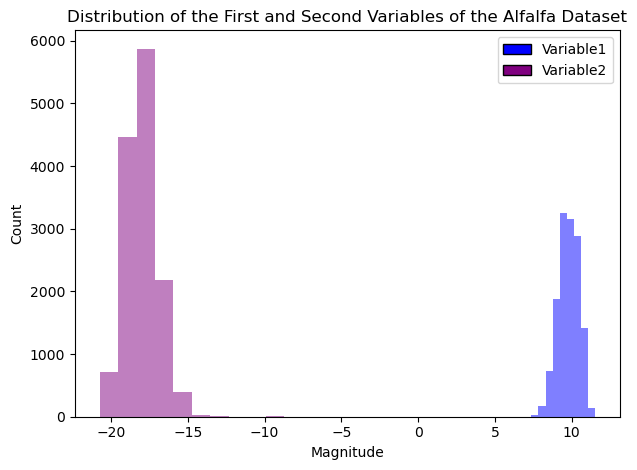

In [53]:
# Plot a histogram of just the first two values so the normalization is easier to visualize
colors = ["blue", "purple", "red", 'black']   
plt.hist(inp_alf[:,0], color=colors[0], alpha=0.5)
plt.hist(inp_alf[:,1], color=colors[1], alpha=0.5)

handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
labels = ["Variable1", "Variable2"]
plt.legend(handles, labels, loc='best')
plt.ylabel('Count')
plt.xlabel('Magnitude')
plt.title('Distribution of the First and Second Variables of the Alfalfa Dataset')
plt.tight_layout()
plt.show()

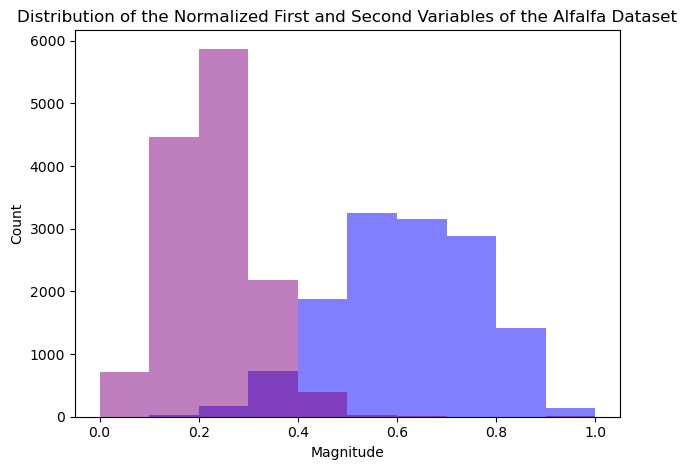

(13674, 15)

In [56]:
# Normalize the data

# Initialize the scikit learn "MinMaxScaler" preprocessing estimator, which scales and translates each feature of the dataset individually
# such that it is within the given range of the training set. In this case, the range is 0 to 1.
sc = MinMaxScaler()

# Train the estimator on the input alfalfa data. This method calculates the mean and variance of each of the features present in the data. 
sc.fit(inp_alf)

# Apply the method to the alfalfa data, to transform all of the features using their respective mean and variance.
inp_alf_norm = sc.transform(inp_alf)

# Plot the same histogram again, to visualize it's shape and range to confirm the transform was done correctly. 
colors = ["blue", "purple"] 
plt.hist(inp_alf_norm[:,0], color=colors[0], alpha=0.5)
plt.hist(inp_alf_norm[:,1], color=colors[1], alpha=0.5)
plt.ylabel('Count')
plt.xlabel('Magnitude')
plt.title('Distribution of the Normalized First and Second Variables of the Alfalfa Dataset')
plt.tight_layout()
plt.show()

# Print the shape of the dataset to ensure no information was lost.
np.shape(inp_alf_norm)

The dataset has now been normalized such that all of the variables now have a range in magnitude between 0 and 1. This means that I can use PCA as all of the data is now comparable (ie. at the same scale).

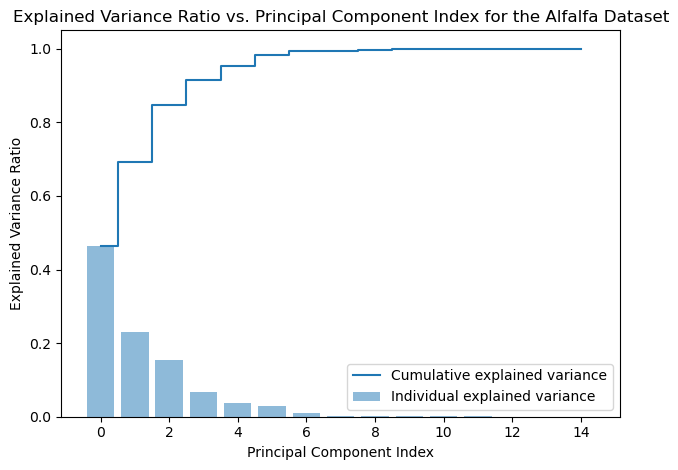

In [5]:
# Initialize scikit learns principal component analysis function
pca = PCA()

# Determine transformed features
inp_alf_pca = pca.fit_transform(inp_alf_norm)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Explained Variance Ratio vs. Principal Component Index for the Alfalfa Dataset')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Discussion

As displayed in the "

# Wine Dataset

In [42]:
# Load the red wine csv 
red = pd.read_csv('winequality-red.csv', sep=';')

# Create a new variable to flag red vs white wine for distinction when combining data. Label red as "1". 
red['red_vs_white'] = 1

# Load the white wine csv 
white = pd.read_csv('winequality-white.csv', sep=';')

# Create a new variable to flag red vs white wine for distinction when combining data. Label white as "0". 
white['red_vs_white'] =  0

# To ensure the datasets have the same values (ie. when appending no NaNs are present), print the column names 
red_columns = list(red.columns.values)
print(red_columns)
white_columns = list(white.columns.values)
print(white_columns)

# Print the shape of the red wine dataset 
print(np.shape(red))

# Print the shape of the white wine dataset
print(np.shape(white))

# Append the red and white wines together
all_wines = red.append(white)

# Print the shape of the appended datasets to ensure that all data was retained.
print(np.shape(all_wines))

# Check for NaNs in appended dataset (the readme says there aren't, but good to check)
all_wines.isnull().values.any()

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'red_vs_white']
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'red_vs_white']
(1599, 13)
(4898, 13)
(6497, 13)


False

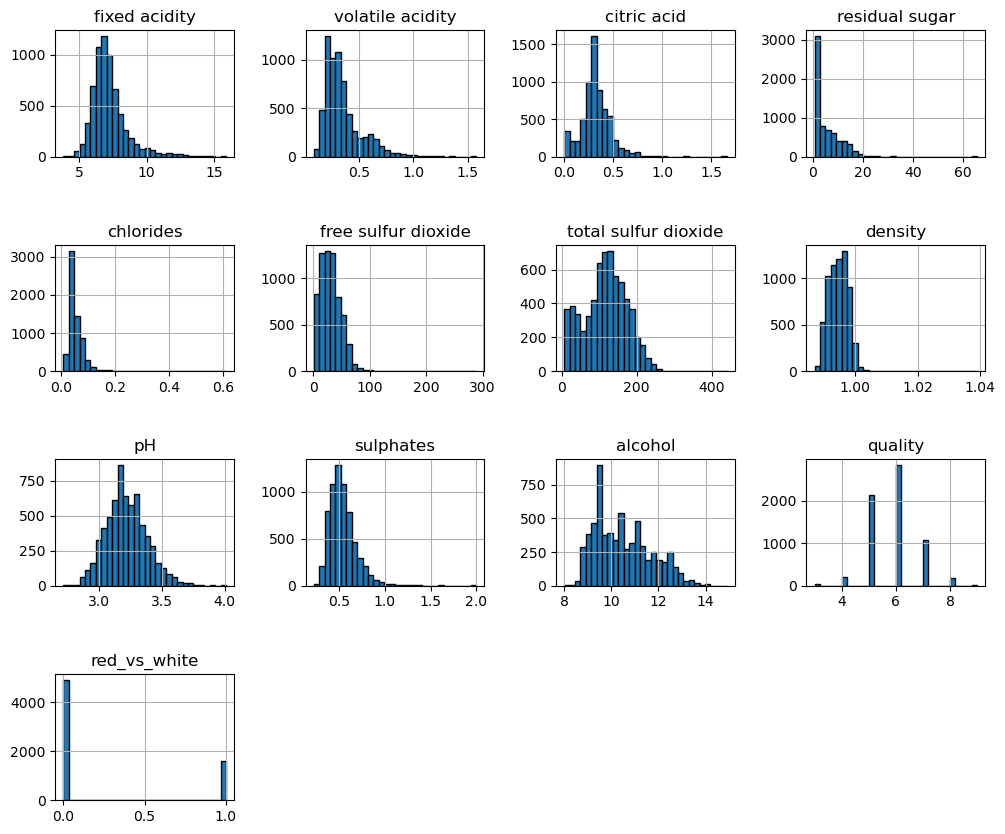

In [23]:
# Plot histograms of the appended data
all_wines.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

The PCA analysis will be skewed towards white wines, as there are more white than red wines contained in the dataset, as visible in the "red_vs_white" histogram.

(6497, 13)
(6497, 13)


Text(0.5, 1.0, 'Original Data and Transformed Data: Displaying Normalization')

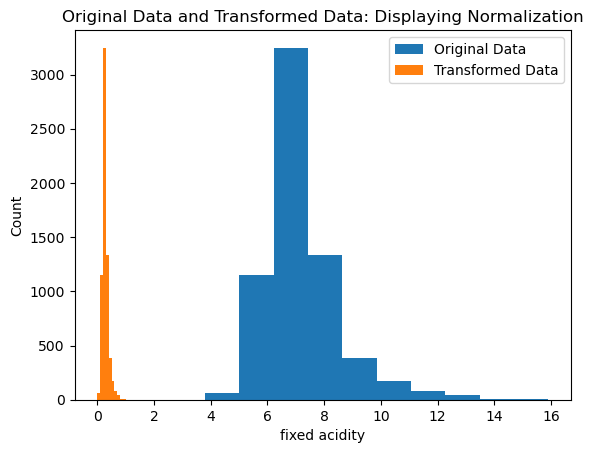

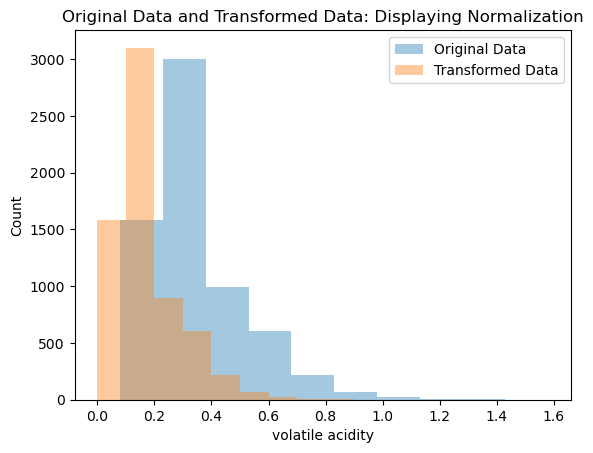

In [84]:
# Call the same MinMaxScaler preprocessing estimator as was defined in the alfalfa dataset, and retrain it on the wine dataset.
sc.fit(all_wines)

# Transform the wine data with the trained MinMaxScaler estimator. 
all_wines_norm = sc.transform(all_wines)

print(np.shape(all_wines_norm))
print(np.shape(all_wines))

fig, ax = plt.subplots(1, 1)
ax.set_xlabel(str(all_wines.columns[0]))
ax.set_ylabel('Count');
ax.hist(all_wines.iloc[:,0])
ax.hist(all_wines_norm[:,0])
ax.legend(('Original Data', 'Transformed Data'), loc='upper right');
plt.title('Original Data and Transformed Data: Displaying Normalization')

fig2, ax2 = plt.subplots(1, 1)
ax2.set_xlabel(str(all_wines.columns[1]))
ax2.set_ylabel('Count');
ax2.hist(all_wines.iloc[:,1], alpha=0.4)
ax2.hist(all_wines_norm[:,1], alpha=0.4)
ax2.legend(('Original Data', 'Transformed Data'), loc='upper right');
plt.title('Original Data and Transformed Data: Displaying Normalization')


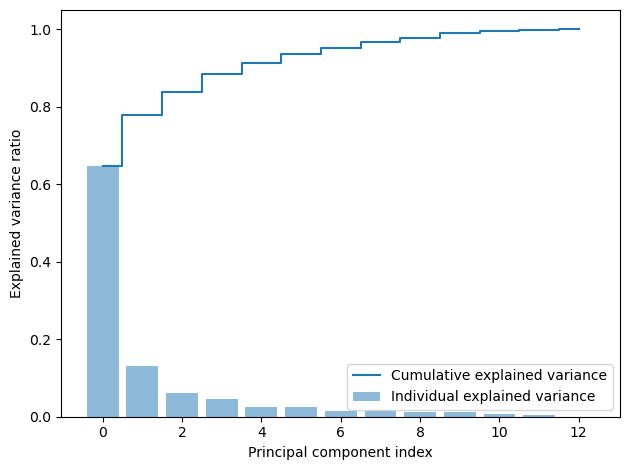

In [26]:
pca = PCA()

# Determine transformed features
wines_pca = pca.fit_transform(all_wines_norm)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Discussion

# Conclusion

## References

Bishop, C. M. (2006). Pattern recognition and machine learning. In Pattern recognition and machine learning. Springer.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html